Text(0.5, 0, '$y$')

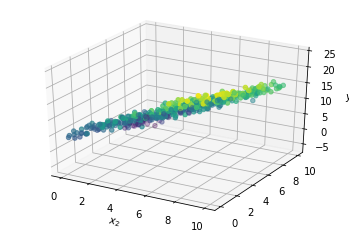

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import statsmodels.api as sm  
from mpl_toolkits.mplot3d import Axes3D

n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1

np.random.seed(1)
x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc=0, scale=1, size=n)
# print(y)
X = np.stack([x_1, x_2], axis=1)

# this next line can help (got it from stackoverflow)
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_xlabel("$x_2$")
ax.set_zlabel("$y$")
# the Harvard Prof used Jupyter notebooks in Anaconda and was able to rotate this.

In [2]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(X, y)
# output: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print(lm.intercept_) # Beta0 this is the <y> intercept

5.154077763777254


In [3]:
print(lm.coef_[0]) # Beta1 this is the first slope

1.9999378989891399


In [4]:
lm.coef_[1] # Beta2 this is the 2nd slope

-1.020264486993336

In [5]:
# We can also try to predict the value of the outcome for some value of x.
# say we're interested in the value of the outcome when x1 is equal to 2 and x2 is equal to 4.
X_0 = np.array([2,4])  #values of X1 = 2, X2 = 4 (single data point)

In [6]:
lm.predict(X_0.reshape(1,-1))  # get predicted output

array([5.07289561])

In [7]:
# We can also find out the score, the r-squared statistic, how well the model works.
# X is the Matrix and y is the outcome
lm.score(X, y)

0.9798997316600129

In [8]:
# we have a very high r-squared value, 0.98. This would be unusually high in 
# most applications.
# QUIZ QUESTION:
# We estimated the values of three parameters. Which 
# of these estimates is closest to its true value?
#        The answer was Beta1
#        I only got this wrong because instead of -2 below I put -1

In [9]:
print('Beta0', 5.07289561-5)

Beta0 0.07289560999999978


In [10]:
print('Beta1', 1.9999378989891399-2)

Beta1 -6.21010108601272e-05


In [11]:
print('Beta2', -1.020264486993336-(-1))

Beta2 -0.02026448699333594
